# Project 3: Poisonous mushrooms

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 observations, where each mushroom is described by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. Since all the observations are categorical, I've binarized the feature space. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using KMeans and density estimation with Gaussian Mixture Models. Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from matplotlib.colors import LogNorm
from sklearn.mixture import GaussianMixture

import seaborn as sns
import pandas as pd

Load feature names.

In [2]:
feature_names = []
with open('../Data/mushroom.map') as fmap:
    for line in fmap:
        [index, name, junk] = line.split()
        feature_names.append(name)

print('Loaded feature names:', len(feature_names))

Loaded feature names: 126


Load data. The data is sparse in the input file, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [3]:
X, Y = [], []

with open('../Data/mushroom.data') as fdata:
    for line in fdata:
        items = line.split()
        Y.append(int(items.pop(0)))
        x = np.zeros(len(feature_names))
        for item in items:
            feature = int(item.split(':')[0])
            x[feature] = 1
        X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print(train_data.shape, test_data.shape)

(7000, 126) (1124, 126)


(1) Run Principal Components Analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 50].

1 0.16404
2 0.13323
3 0.10173
4 0.07063
5 0.03867
6 0.03681
7 0.03128
8 0.02734
9 0.02616
10 0.02231
11 0.02048
12 0.01868
13 0.01734
14 0.01684
15 0.01519
16 0.01509
17 0.01429
18 0.01412
19 0.01325
20 0.01146
21 0.01071
22 0.01066
23 0.01041
24 0.00994
25 0.00908
26 0.00869
27 0.00796
28 0.00776
29 0.00738
30 0.007
31 0.00641
32 0.00615
33 0.00572
34 0.00534
35 0.00526
36 0.00503
37 0.00499
38 0.00456
39 0.00453
40 0.0044
41 0.00419
42 0.00398
43 0.0037
44 0.0036
45 0.00338
46 0.00299
47 0.00272
48 0.00236
49 0.00221
50 0.00204


Text(0.5,0,'Principal Component')

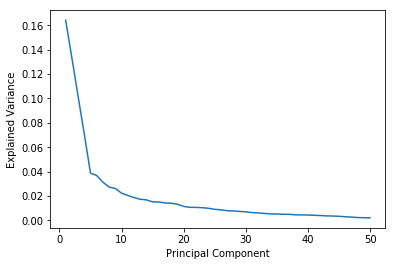

In [4]:
#def P1():
### STUDENT START ###
pca = PCA(n_components=50) # Initialize PCA with 50 comoponents
pca.fit(train_data) # Fit PCA model to training data

# For each principal component, print the component and the variance explained by it
explained_variance = pca.explained_variance_ratio_ 
for i in range(pca.n_components):
    print(i+1, round(explained_variance[i],5))

plt.plot(np.linspace(1,50), explained_variance)
plt.ylabel("Explained Variance")
plt.xlabel("Principal Component")
### STUDENT END ###

#P1()

(2) PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and plot it. Show the positive (poisonous) cases in blue and the negative (non-poisonous) in red. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

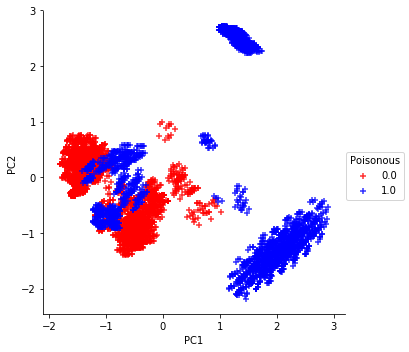

In [5]:
#def P2():
### STUDENT START ###
pca = PCA(n_components=2) # Initialize PCA model with 2 components
X_r = pca.fit_transform(train_data) # Fit the training data and transform it in the the low dimensional space
colors = ['blue','red'] # assign colors blue for positive (poisonous) and red for negative (non-poisonous)
hue = train_labels.reshape(7000,1) # reshape labels to use in assigning scatter plot colors
d2 = np.concatenate([X_r, hue], axis=1) # join low dimensionality data and labels together in data frame to plot
d2 = pd.DataFrame(d2, columns=['PC1','PC2','Poisonous']) # add column labels
sns.lmplot(x='PC1',y='PC2', fit_reg=False ,data=d2, hue='Poisonous', markers='+',palette={0:'r',1:'b'}) # create a scatter plot of the data

# plt.scatter(X_r[:,0],X_r[:,1])
### STUDENT END ###

#P2()

(3) Run KMeans with [1,16] clusters over the 2d projected data. Mark each centroid cluster and plot a circle that goes through the most distant point assigned to each cluster.

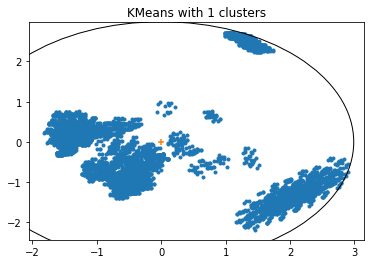

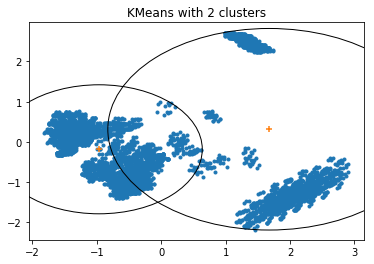

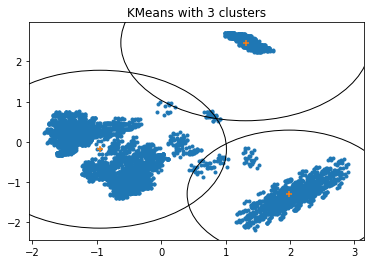

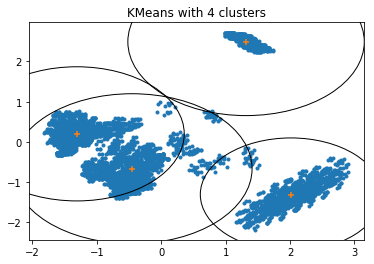

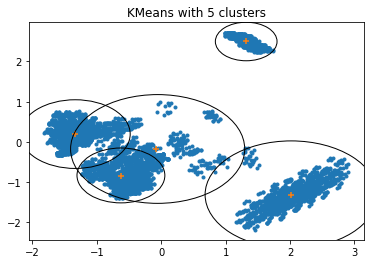

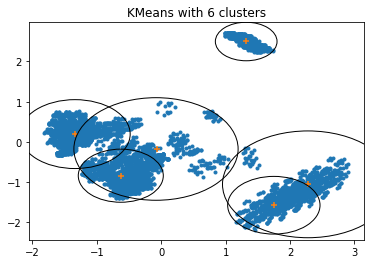

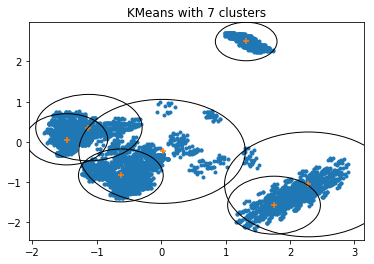

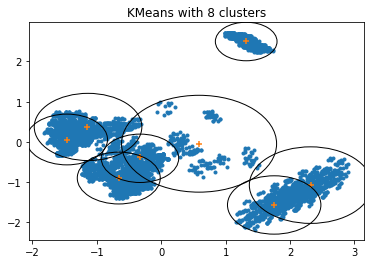

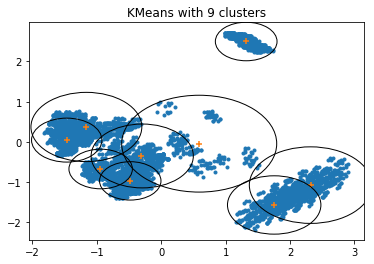

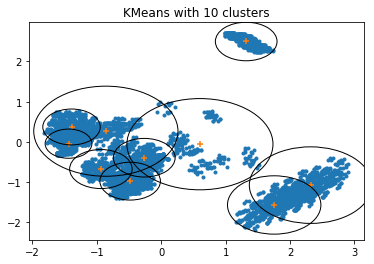

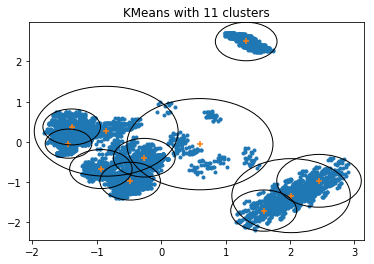

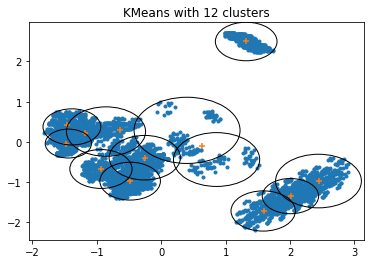

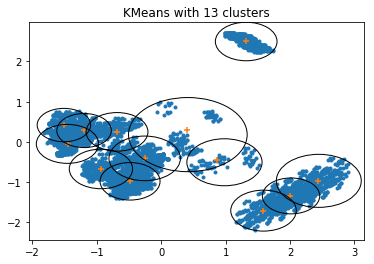

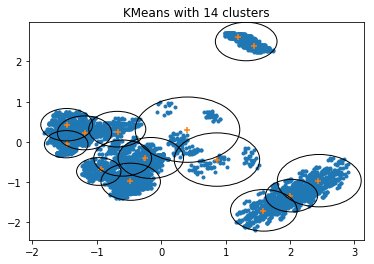

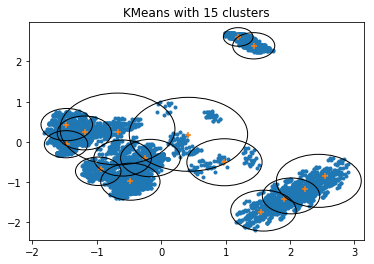

In [13]:
#def P3():
### STUDENT START ###
for n in range(1,16):
    km=KMeans(n_clusters=n) # Initialize a KMeans model with 16 clsuters
    km.fit(X_r) # Fit the KMeans model to the low-dimensionality data
    d3 = pd.DataFrame(km.cluster_centers_, columns=['X','Y']) # put the cluster_centers into a dataframe to plot


    # sns.lmplot(x='X',y='Y', data=d3, markers='+',fit_reg=False)
    # sns.lmplot(x='PC1',y='PC2', fit_reg=False ,data=d2, hue='Poisonous', markers='+',palette={0:'r',1:'b'})
    plt.figure() # create a new figure
    plt.scatter(d2['PC1'],d2['PC2'],marker='.') # plot the low-dimensionality data
    plt.scatter(d3['X'], d3['Y'],marker='+') # plot the cluseter centers

    ax = plt.gca()
    distances=km.fit_transform(X_r) # record the distances of each datapoint to each cluster center
    # for each cluster center, find the data assigned to the cluster, then find the maximum distance among that data, 
    # then add a circle around the cluster center with that distance as the radius
    for cluster in range(n):
        dataincluster = distances[km.labels_ == cluster] # find the data belonging the cluster
        maxdistance = np.max(dataincluster[:,cluster]) # find the furthest datapoint in that cluster
        ax.add_artist(plt.Circle(np.array([km.cluster_centers_[cluster][0], km.cluster_centers_[cluster][1]]), radius=maxdistance, fill=False,lw=1)) # draw a circle around the cluster center
    plt.title("KMeans with {} clusters".format(n))
### STUDENT END ###

#P3()

(4) Fit a Gaussian Mixture Model for the positive examples in your 2d projected data. Plot the estimated density contours as shown here: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py. Vary the number of mixture components from 1-4 and the covariance matrix type ('spherical', 'diag', 'tied', 'full').

C:\Users\Beau\Anaconda3\lib\site-packages\matplotlib\contour.py:1538: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


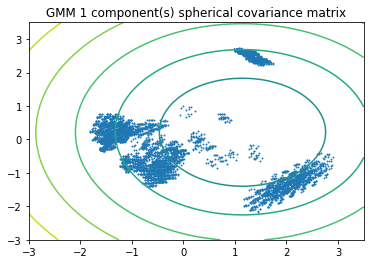

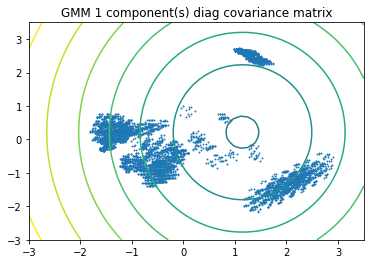

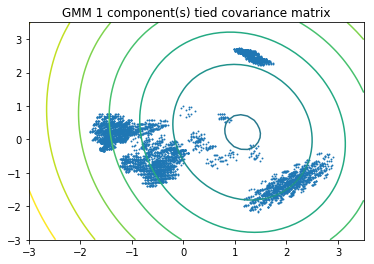

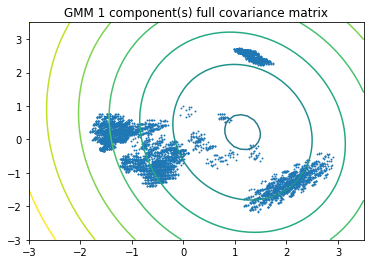

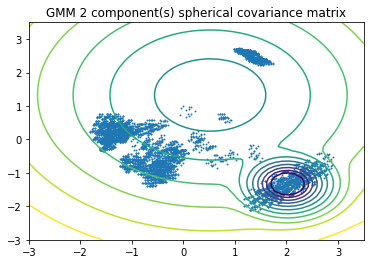

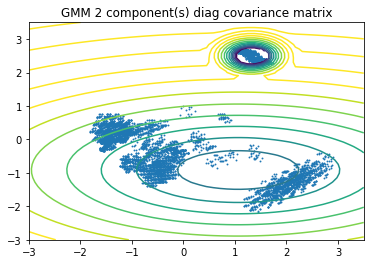

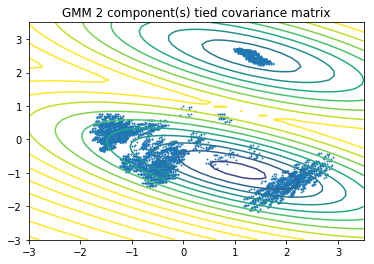

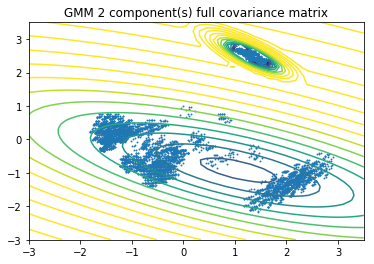

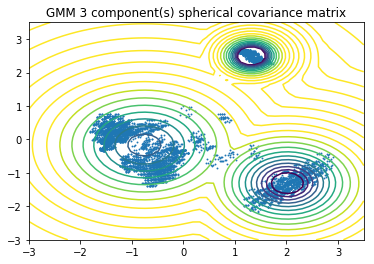

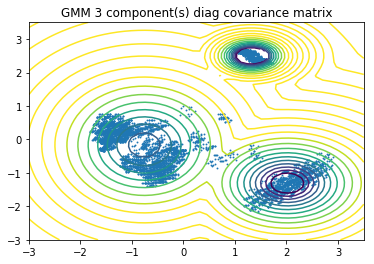

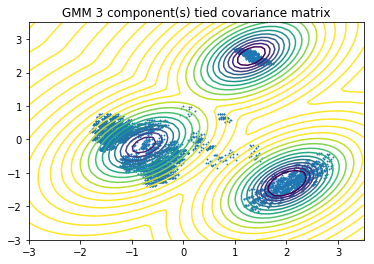

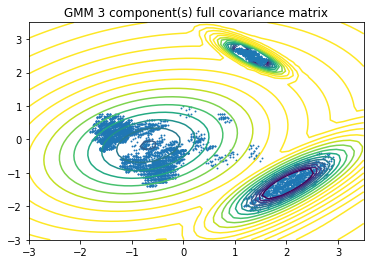

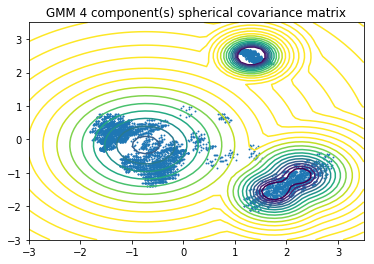

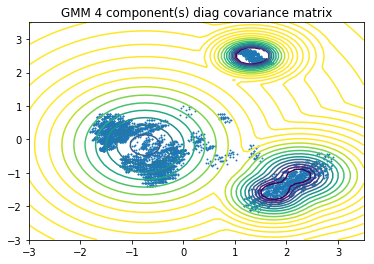

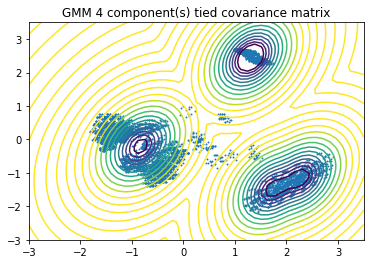

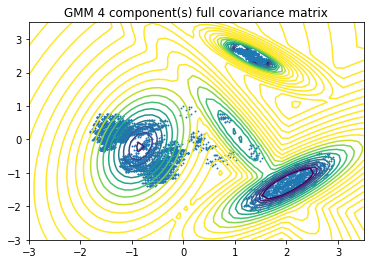

In [12]:
#def P4():
### STUDENT START ###
d4 = d2[d2.Poisonous==1] # Select only the data for positive (poisonous) cases
del d4['Poisonous'] # remove the labels from the dataframe

# Initialize the parameters to be tried
components = [1,2,3,4] # number of components for GMM
covmat = ['spherical','diag','tied','full'] # types of covariance matrices for GMM

# Try and plot all possible combinations of components and covariance matrices (16 in total)
for component in components:
    for covtype in covmat:
        gmm = GaussianMixture(n_components=component, covariance_type=covtype) # intialize GMM with component and covariance matrix type
        gmm.fit(d4) # fit it to the low dimensionality data
        
        plt.figure() # create a new figure
        x = np.linspace(-3., 3.5) # establish the width in X axis
        y = np.linspace(-3., 3.5) # estalbish the width in Y axis
        X, Y = np.meshgrid(x, y) # create a meshgrid of coordinates
        XX = np.array([X.ravel(), Y.ravel()]).T # Flatten the grid out and transpose it
        Z = -gmm.score_samples(XX) # compute the weighted log probabilites for each sample
        Z = Z.reshape(X.shape) # Reshape log probabilities array in same shape as grid
        CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1, vmax=10),
                         levels=np.logspace(0, 10,100)) # plot the grid and the log probabilities 
#         CB = plt.colorbar(CS, shrink=0.8, extend='both')
        plt.scatter(X_r[:, 0], X_r[:, 1], .8) # plot the low-dimnesionality data
        plt.title("GMM {} component(s) {} covariance matrix".format(component, covtype)) # add titles for each plot

### STUDENT END ###

#P4()

(5) Fit two 4-component full covariance GMMs, one for the positive examples and one for the negative examples in your 2d projected data. Predict the test examples by choosing the label for which the model gives a larger probability (use GMM.score). What is the accuracy?

In [14]:
#def P5():
### STUDENT START ###
seed = 0 # set seed so resutls are reproducible
gmm0 = GaussianMixture(n_components=4, random_state=seed) # initialize GMM for negative (non-poisonous examples)
gmm1 = GaussianMixture(n_components=4, random_state=seed) # initialize GMM for positive (poisonous examples)
d5 = d2[d2.Poisonous==0] # select just the negative (non-poisonous) examples
del d5['Poisonous'] # delete the label column
gmm0.fit(d5) # fit the GMM to the negative (non-poisonous) examples
gmm1.fit(d4) # fit the GMM to the positive (poisonous) examples

X_t = pca.transform(test_data) # transform the test data into low-dimensional space
models = [gmm0, gmm1] # initialize the models to choose from
scores = [2**gmm0.score(X_t),2**gmm1.score(X_t)] # record the scores for each model (translated into normal probability space)
better_model = models[np.argmax(scores)] # select the better model of the two

pred = better_model.predict(X_t) # use the better model to predict on the test data
accuracy = np.mean(pred.ravel() == test_labels.ravel()) * 100 # calculate the accuracy
print("Accuracy: ",accuracy) # print the accuracy
### STUDENT END ###

#P5()

Accuracy:  20.99644128113879


(6) Ideally, we'd like a model that gives the best accuracy with the fewest parameters. Run a series of experiments to find the model that gives the best accuracy with no more than 50 parameters. For example, with 3 PCA components and 2-component diagonal covariance GMMs, you'd have:

( (3 mean vector + 3 covariance matrix) x 2 components ) x 2 classes = 24 parameters

You should vary the number of PCA components, the number of GMM components, and the covariance type.

In [15]:
#def P6():
### STUDENT START ###
pcacomponents = np.arange(1,5) # create an array of components to use for PCA
for n in pcacomponents:
    pca = PCA(n_components=n, random_state=seed) # Initialize PCA model with n components
    X_r = pca.fit_transform(train_data) # fit the training data and transform it into n dimensional space
    X_t = pca.transform(test_data) # transform the test data into n dimensional space
    
    print("\n")
    print("PCA with {} Components".format(n)) 
    covmat = ['spherical','diag','tied','full'] # Initialize list of covariance matrices
    gmmcomponents = np.arange(2,3) # Inialize array of components
    # For each possible component, covariance matrix fit it to the n-dimensional training data and predict on the n-dimensional test data
    for component in gmmcomponents:
        for covtype in covmat:
            gmm = GaussianMixture(n_components=component, covariance_type=covtype, random_state=seed) # initialize Gaussian Mixture model
            gmm.fit(X_r) # fit Gausian Mixture model on n-dimensional training data
            pred = gmm.predict(X_t) # predict on the n-dimensional test data
            accuracy = np.mean(pred.ravel() == test_labels.ravel()) * 100 # calculate the accuracy
            print("Accuracy: {} {} Component GMM Covariance Matrix: {}".format(accuracy, component, covtype)) # print results
### STUDENT END ###

#P6()



PCA with 1 Components
Accuracy: 88.43416370106762 2 Component GMM Covariance Matrix: spherical
Accuracy: 88.43416370106762 2 Component GMM Covariance Matrix: diag
Accuracy: 88.34519572953737 2 Component GMM Covariance Matrix: tied
Accuracy: 88.43416370106762 2 Component GMM Covariance Matrix: full


PCA with 2 Components
Accuracy: 67.08185053380782 2 Component GMM Covariance Matrix: spherical
Accuracy: 66.99288256227757 2 Component GMM Covariance Matrix: diag
Accuracy: 67.88256227758008 2 Component GMM Covariance Matrix: tied
Accuracy: 67.61565836298932 2 Component GMM Covariance Matrix: full


PCA with 3 Components
Accuracy: 67.61565836298932 2 Component GMM Covariance Matrix: spherical
Accuracy: 67.43772241992883 2 Component GMM Covariance Matrix: diag
Accuracy: 68.14946619217082 2 Component GMM Covariance Matrix: tied
Accuracy: 67.61565836298932 2 Component GMM Covariance Matrix: full


PCA with 4 Components
Accuracy: 84.51957295373666 2 Component GMM Covariance Matrix: spherical
